# "Full Steam Ahead" - Team Project - Group 20

## Data

We are analyzing usage data from Steam which is a video game digital distribution service. Steam currently has 120 million users and over 50,000 games. Our aim was to analyze this huge dataset and find interesting patterns, gaming trends, relationships between users, locations, popular game genres, trends in the price of games, usage and game ratings.

We sourced our data from https://steam.internet.byu.edu. The complete dataset was over 170 GBs and was available in SQL format. For our analysis, we have taken a subset of the entire dataset by random sampling. Our data is about 10 GB.

In order to collect and work on the data via pandas and other libraries we converted the data from the SQL dump to CSV format. This was done in multiple steps:

* First we used mysqldump to import the SQL data into a MySQL db.
* Then using a python script we extracted and converted the data into multiple CSV files. 

## Exploratory Data Analysis

## Data Description

Given below is the description of all the data in our dataset alongwith the description of the columns in each CSV file.

### ACHIEVEMENT_PERCENTAGES

* appid : The ID of the game in question
* Name : The name of the achievement as it appears to players. As an internal value assigned by developers, its descriptiveness of the achievement varies.
* Percentage : The percentage of players who have finished this achievement out of all total players who own this game.

### APP_ID_INFO

* appid : The ID of the "app" in question, which is not necessarily a game.
* Title : The Title of the app, as it appears to users
* Type : The type of the "app". Possible values include: "demo," "dlc," "game," "hardware," "mod," and "video." Game is the most common.
* Price : The current price of the "app" on the Steam storefront, in US dollars. Free items have a price of 0.
* Release_Date : The date the "app" was made available via the Steam storefront. Note that apps released elsewhere originally and later published through steam carry the date of the Steam publish
* Rating : The rating of the "app" on Metacritic. Set to -1 if not applicable.
* Required_Age : The MSRB or PEGI-assigned age requirement for viewing this game in the Steam storefront, and, by extension, clicking the button to purchase it.
* Is_Multiplayer : A value of either 0 or 1 indicating whether or not an "app" contains multiplayer content. Self-reported by developers.

### FRIENDS

* steamid_a : The Steam ID of the user who's friend list was queried
* steamid_b : The Steam ID of the a user who is a friend of the user referenced by steamid_a
* relationship : The type of relationship represented by this entry. Currently the only value used is "friend"
* friend_since : The date and time when the users in this entry became friends. Note that this field was added in 2009 and thus all frienships existing previous this date are recorded with the default unix timestamp (1970)
* dateretrieved : Timestamp when this friend list data was requested from the API


### GAMES_DEVELOPERS
* appid : ID of the app in question
* Developer : A developer of the app in question. Note that some apps have multiple developers and thus numerous distinct rows with the same appid are possible.

### GAMES_GENRES
* appid : ID of the app in question
* Genre : A genre of the app in question. Note that most apps have multiple genres and thus numerous distinct rows with the same appid are possible.

### GAMES
* steamid : The steam ID of the user in question
* appid : The ID of a given app in the user's library
* playtime_2weeks : The total time the user has run this app in the two-week period leading up to when this data was requested from the API. Values are given in minutes.
* playtime_forever : The total time the user has run this app since adding it to their library. Values are given in minutes.
* playtime_windows_forever : The total time the user has run this app on windows.
* playtime_mac_forever : The total time the user has run this app on mac.
* playtime_linux_forever : The total time the user has run this app on linux.

### PLAYER_SUMMARIES

* steamid : The Steam ID of the user in question
* lastlogoff : Timestamp of the time when this game data was requested from the API
* primaryclanid : The groupid (Groups::groupid) of the group that the user has designated as their primary group
* timecreated : Timestamp of the time when the account was created
* gameid : If the user was in-game at the time of the API request, this value specifies which game they were running at the time
* gameserverip : If the user was in-game at the time of the request, and playing a game using Steam matchmaking, this value specifies the IP of the server they were connected to. Is otherwise set to "0.0.0.0:0"
* loccountrycode : ISO-3166 code for the country in which the user resides. Self-reported.
* locstatecode : State where the user resides. Self-reported.
* loccityid : Internal Steam ID corresponding to the city where the user resides. Self-reported.
* dateretrieved : Timestamp of the time when this game data was requested from the API

## Data Cleaning

We performed the following steps for cleaning the data:
- Converted different SQL tables in the original data into different CSV files.
- Removed the index column as it is not used in any of our analysis.
- Joined app_ID_Info and Acheievement_Percentages on app_id so that the entire relation is available easily for analysis.
- Joined the app_id and name to see if there are any duplicate achievements and found that there were no repeated acheivements, which is great!
- Dropped the columns `relationship` and `dateretrieved` from `Friends` data since the first one has only a constant value for all cases and the second one is not relevant to our analysis.
- Dropped the rows with `friend_since` column less than 2009 since the field `friend_since` was added in 2009 and all the other entries before that had the epoch date set as a filler date.

Our dataset can be accessed here: https://drive.google.com/drive/folders/1e1Glb5BCmQZfhiDMsI0GLks16RtmZYDb?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas_profiling import ProfileReport

In [2]:
achievement_pct = pd.read_csv("Achievement_Percentages.csv")
achievement_pct = achievement_pct.drop(['idx'],axis=1)
app_ids_info = pd.read_csv("App_ID_Info.csv")
app_ids_info = app_ids_info.drop(['idx'],axis=1)
joined_data = achievement_pct.merge(app_ids_info, left_on="appid", right_on=" appid", how="inner")

In [3]:
print(joined_data.head(5))

   appid      name  percentage   appid                      title  type  \
0     50      ach0    0.091038      50  Half-Life: Opposing Force  game   
1     50      ach1    0.088308      50  Half-Life: Opposing Force  game   
2     50      ach2    0.088496      50  Half-Life: Opposing Force  game   
3     50  grp_ach0    0.010733      50  Half-Life: Opposing Force  game   
4     50  grp_ach1    0.010638      50  Half-Life: Opposing Force  game   

    Price         Release_date   Rating   Required_Age   Is_Multiplayer  
0    4.99  1999-11-01 00:00:00       -1              0                1  
1    4.99  1999-11-01 00:00:00       -1              0                1  
2    4.99  1999-11-01 00:00:00       -1              0                1  
3    4.99  1999-11-01 00:00:00       -1              0                1  
4    4.99  1999-11-01 00:00:00       -1              0                1  


In [4]:
print(achievement_pct.percentage.describe())

count    156253.000000
mean         12.495696
std          17.335418
min           0.000000
25%           1.324810
50%           4.818070
75%          16.293500
max         100.000000
Name: percentage, dtype: float64


### Meaning of Initial Summary Statistics
- A very small percentage of people on average try to complete all the achievements in a game
- This could potentially mean that a lot of achievements are post-game, so it could be used as a metric to identify the popularity of a game. If a community really likes a game, they'll try playing it to beyond 'completion'
- This is further supported by the strongly left skewed graph below

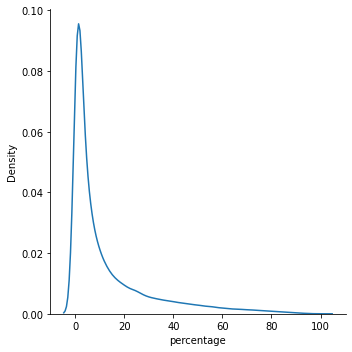

In [5]:
sns.displot(joined_data, x="percentage", kind="kde")

In [6]:
joined_data["Joined"] = joined_data["appid"].astype(str) + " "+joined_data["name"].astype(str)
print(len(joined_data.Joined.unique()))

156253


In [7]:
stat = joined_data[[" title","percentage"]].groupby(" title",as_index=False).agg(mean=('percentage','mean'),count=('percentage','count')).sort_values('mean',ascending=False)
print(stat)

                    title       mean  count
1365          Empires Mod  84.099186      9
4629       Youtubers Life  83.333350      2
1208  Don't drop the soap  83.333300      2
1271      Dungeon Dashers  79.080500      1
4142             The Room  72.417760      5
...                   ...        ...    ...
2232              La Tale   0.000000      2
106                   AER   0.000000      4
1907               HoPiKo   0.000000      3
1664          Geek Resort   0.000000      1
603             Boundless   0.000000      1

[4713 rows x 3 columns]


                                 title      mean  count
1370                        Endorlight  0.001779      1
2451                   Master of Orion  0.001348     35
1546                          Flotilla  0.001099      3
3586                          SolForge  0.000463      4
122       ARK: Survival Of The Fittest  0.000120      1
331   Assassin’s Creed® IV Black Flag™  0.000098      1
3618                  Source Filmmaker  0.000077      1
4367                         Undertale  0.000060      1
314        Arma 2: Operation Arrowhead  0.000029      5
1795               H1Z1 : Just Survive  0.000011      3


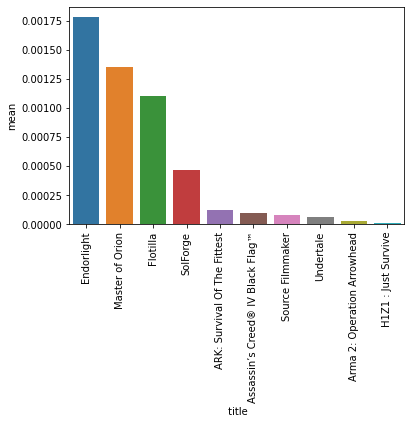

In [8]:
stat = stat[stat['mean']!=0]
stattail = stat.tail(10)
stathead = stat.head(10)
tails = sns.barplot(x=" title",y="mean",data=stattail)
for item in tails.get_xticklabels():
    item.set_rotation(90)

print(stattail)


                           title       mean  count
1365                 Empires Mod  84.099186      9
4629              Youtubers Life  83.333350      2
1208         Don't drop the soap  83.333300      2
1271             Dungeon Dashers  79.080500      1
4142                    The Room  72.417760      5
590            Borderless Gaming  71.514600      1
719                   Carpe Diem  67.145100      1
4178  The Walking Dead: Season 2  66.183892     40
4602          Written in the Sky  65.980000      2
2617                     My Lady  65.853211      9


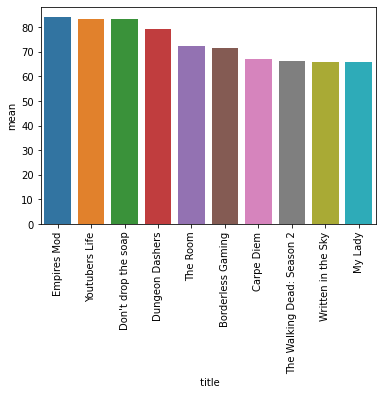

In [9]:
heads = sns.barplot(x=" title",y="mean",data=stathead)
for item in heads.get_xticklabels():
    item.set_rotation(90)
print(stathead)

In [10]:
ProfileReport(achievement_pct)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
age_grp = joined_data.groupby(' Required_Age', as_index=False).mean()
print(age_grp)

    Required_Age          appid  percentage          appid      Price  \
0              0  286929.359798   12.176029  286929.359798  11.913905   
1             10  331279.888889   15.363729  331279.888889  10.467778   
2             12  361880.096154   17.755548  361880.096154  18.634231   
3             13  322888.521127   16.937425  322888.521127  21.258905   
4             14  342495.161290   12.224823  342495.161290  16.473871   
5             15  353416.986301   16.927607  353416.986301  10.606438   
6             16  233622.796610   15.203602  233622.796610  21.394105   
7             17  186581.050256   16.138058  186581.050256  23.613945   
8             18  266085.534626   12.106604  266085.534626  18.403269   

      Rating   Is_Multiplayer  
0  22.884654         0.343619  
1  47.155556         0.000000  
2  24.375000         0.447115  
3  22.799687         0.226135  
4  -1.000000         0.000000  
5  -1.000000         0.000000  
6  57.047081         0.327684  
7  53.676103 

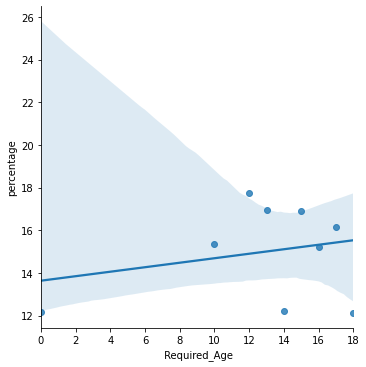

In [12]:
sns.lmplot(x=" Required_Age", y="percentage", data=age_grp)


In [13]:
ProfileReport(age_grp)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- No correlation between required age and percentage completion as confirmed from the above plots and statistics
- lmplot is intended as a convenient interface to fit regression models across conditional subsets of a datase

### We now analyze the relationship between Game Genres

In [20]:
app_id_info = pd.read_csv('App_ID_Info.csv')
games_genres = pd.read_csv('Games_Genres.csv', header=None)

In [21]:
app_id_info.columns = ['index', 'appid', 'Title', 'Type', 'Price', 'Release_Date', 'Rating', 'Required_Age', 'Is_Multiplayer']
games_genres.columns = ['index', 'appid', 'Genre']

In [22]:
app_id_info.head()

index   appid                                             Title  Type  \
0      0   63942  Men of War: Vietnam Special Edition Upgrade Pack   dlc   
1      1  414120                                            Modbox  game   
2      2  363020                                         IPackThat  game   
3      3  399550                     Gladiators Online - Tiro Pack   dlc   
4      4   65258  Train Simulator: Settle Carlisle Specials Add-On   dlc   

   Price         Release_Date  Rating  Required_Age  Is_Multiplayer  
0   2.99  1970-01-01 00:00:00      -1             0               1  
1  14.99  2016-04-05 00:00:00      -1             0               0  
2  64.99  2015-10-06 00:00:00      -1             0               0  
3   0.99  2015-11-04 00:00:00      -1             0               0  
4  29.99  2012-05-03 00:00:00      -1             0               0

In [23]:
games_genres.head()

index  appid   Genre
0      0     10  Action
1      1     20  Action
2      2     30  Action
3      3     40  Action
4      4     50  Action

In [18]:
profile = ProfileReport(app_id_info, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
app_id_info = app_id_info.drop(columns = ['index'])
games_genres = games_genres.drop(columns = ['index'])

In [25]:
app_id_genre_info = app_id_info.merge(games_genres, on=['appid'], how='left')
app_id_genre_info['Release_Date'] = pd.to_datetime(app_id_genre_info['Release_Date'])
## Remove items with default timestamp unix timestamp (1970)
app_id_genre_info = app_id_genre_info[app_id_genre_info['Release_Date'] != '1970-01-01']


## Genre-wise Average Pricing across various Types

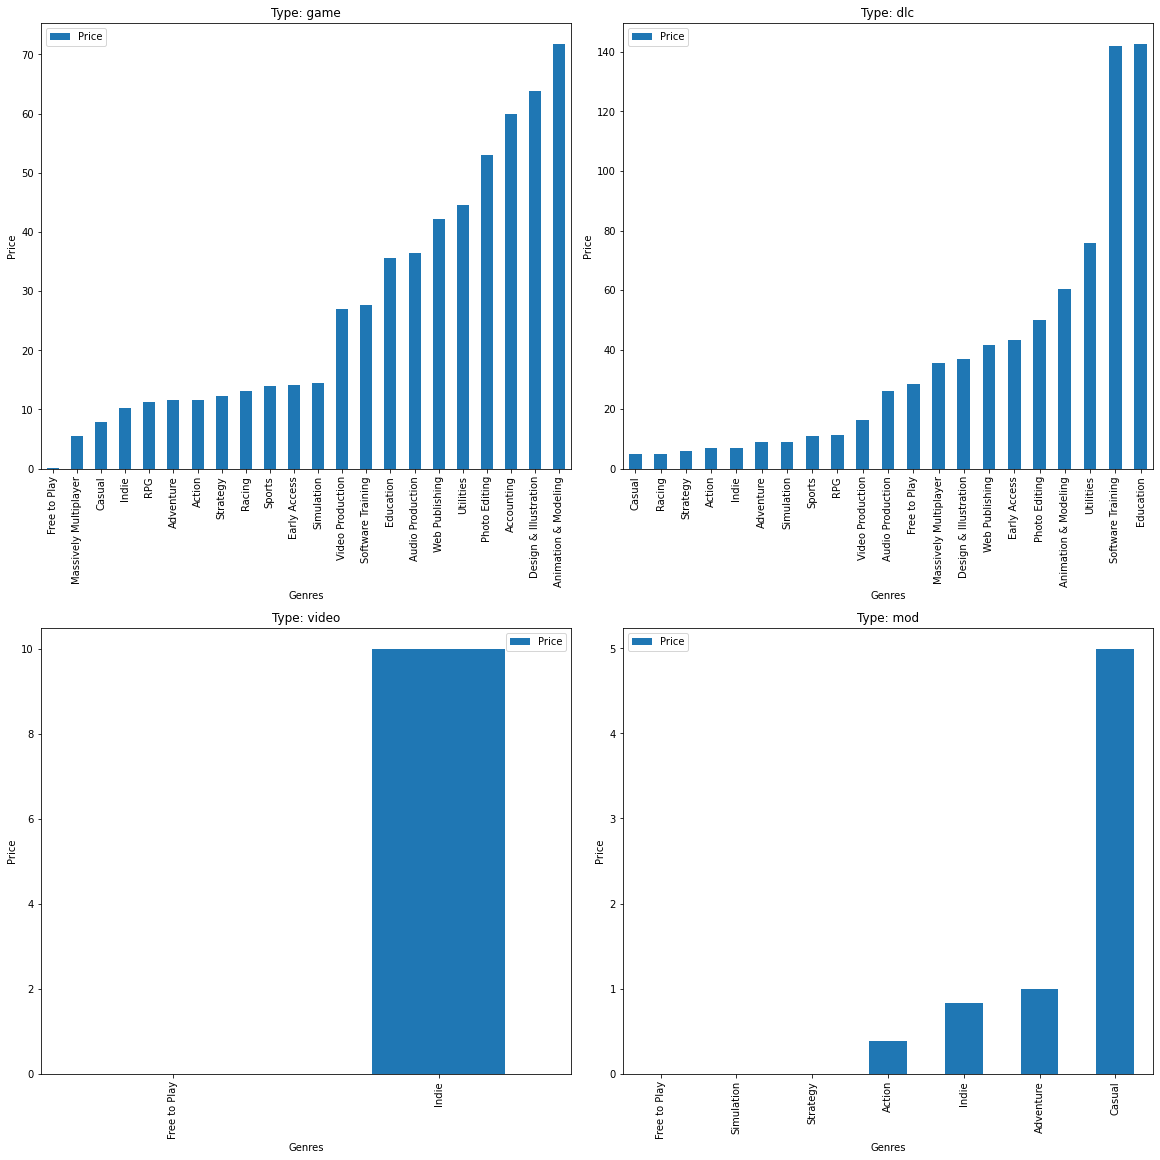

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True)
dfs = []
for index, item_type in enumerate(['game', 'dlc', 'video', 'mod']):
    app_id_genre_info[app_id_genre_info['Type'] == item_type][['Genre', 'Price']].groupby('Genre').mean().sort_values('Price').reset_index().plot.bar(x='Genre', y='Price', xlabel='Genres', ylabel='Price', ax=axes[index//2,index%2], title='Type: {}'.format(item_type))

Several softwares are listed on Steam along with games, as can be seen from the first two graphs. 
In general, these softwares are way more expensive than games. For any further analysis on games, these genres need to be removed.

In [27]:
# Game Genres
(app_id_genre_info[app_id_genre_info['Type'] == 'game'])['Genre'].unique()

array([nan, 'Casual', 'Indie', 'Free to Play', 'RPG', 'Simulation',
       'Sports', 'Strategy', 'Adventure', 'Action', 'Racing',
       'Early Access', 'Design & Illustration', 'Photo Editing',
       'Massively Multiplayer', 'Utilities', 'Animation & Modeling',
       'Education', 'Software Training', 'Web Publishing',
       'Video Production', 'Audio Production', 'Accounting'], dtype=object)

In [28]:
app_id_genre_info['Release_Year'] = app_id_genre_info['Release_Date'].dt.year

In [29]:
relevant_genres = ['Casual', 'Indie', 'Free to Play', 'RPG', 'Simulation', 'Sports', 'Strategy', 'Adventure', 'Action', 'Racing', 'Massively Multiplayer']
app_id_genre_info[(app_id_genre_info['Release_Year'] >=2010) & (app_id_genre_info['Type'] == 'game') & (app_id_genre_info['Genre'].isin(relevant_genres))][['Price','Is_Multiplayer']].groupby('Is_Multiplayer').mean()

Price
Is_Multiplayer           
0               10.517025
1               12.137853

In [30]:
app_id_genre_info[(app_id_genre_info['Release_Year'] >=2010) & (app_id_genre_info['Type'] == 'dlc') & (app_id_genre_info['Genre'].isin(relevant_genres))][['Price','Is_Multiplayer']].groupby('Is_Multiplayer').mean()

Price
Is_Multiplayer           
0                7.324445
1               10.818733

Games and DLCs with a multiplayer component have higher mean prices than games without.

### Average Price of most expensive games year-wise

<AxesSubplot:xlabel='Release Year', ylabel='Average Price of Top 10 most expensive games'>

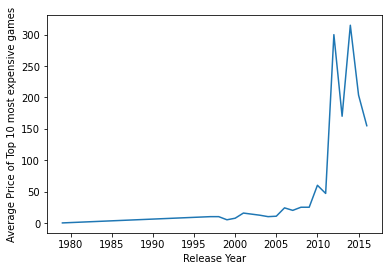

In [31]:
app_id_genre_info[app_id_genre_info['Release_Year'] < 2017].groupby('Release_Year')['Price'].nlargest(10).mean(level=0).plot(xlabel = 'Release Year', ylabel='Average Price of Top 10 most expensive games')

There is a general increase in the prices of the most expensive games released throughout the years.

### Average Prices for games with different age requirements

<AxesSubplot:xlabel='Required Age', ylabel='Average Price'>

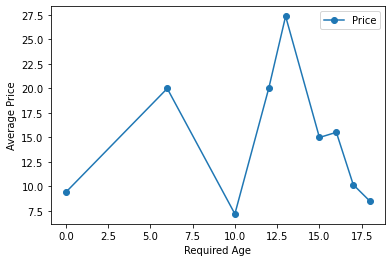

In [32]:
app_id_genre_info[app_id_genre_info['Genre'].isin(relevant_genres)][['Required_Age', 'Price']].groupby('Required_Age').mean().plot(xlabel='Required Age', ylabel='Average Price', marker='o')

There's no apparent correlation between the minimum age requirement for games and their prices.

In [33]:
game_publishers = pd.read_csv("Games_Publishers.csv", header=None)
game_publishers.rename(columns = {1:'appId', 
                       2:'publisher'}, 
            inplace = True)
game_publishers.drop(0,axis=1, inplace=True)

In [34]:
# game developers
game_developers = pd.read_csv("Games_Developers.csv", header=None)
game_developers.rename(columns = {1:'appId', 
                       2:'developer'}, 
            inplace = True)
game_developers.drop(0,axis=1, inplace=True)

# games/app information
app_info = pd.read_csv("App_ID_Info.csv", header=None)
app_info.rename(columns = {1:'appId', 2:'title', 3: "type", 4: "price", 5: "release_date", 6:"rating", 7: "required_age", 8: "multiplayer"},inplace = True)
app_info.drop(0,axis=1, inplace=True)

In [35]:
# User games info
user_games = pd.read_csv("Games.csv")

In [36]:
# Friends Information
friends = pd.read_csv("Friends.csv", header=None, nrows=1000000)
friends.rename(columns = {1:'steamId1', 2:'steamId2', 3: "relationship", 4: "friends_since", 5: "timestamp"},inplace = True)
friends.drop(0,axis=1, inplace=True)

### Games published by publishers distribution

<AxesSubplot:title={'center':'Apps Published by Bottom Publishers'}, xlabel='Popular Publishers', ylabel='Games Published'>

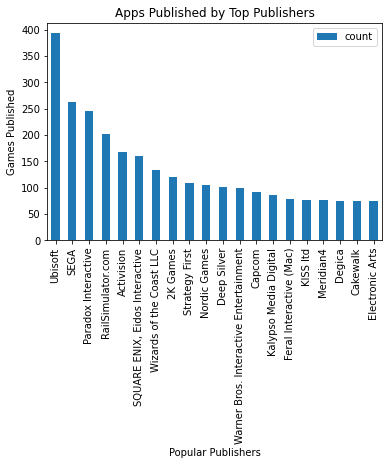

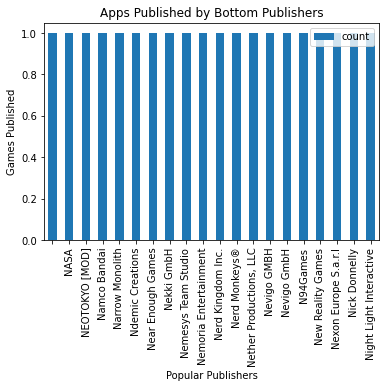

In [37]:
topPublishers = game_publishers.groupby("publisher")["publisher"].count().reset_index(name="count").sort_values("count", ascending=False).head(20)
bottomPublishers = game_publishers.groupby("publisher")["publisher"].count().reset_index(name="count").sort_values("count", ascending=True).head(20)
topPublishers.plot.bar(x='publisher', y='count', xlabel='Popular Publishers', ylabel='Games Published', title='Apps Published by Top Publishers')
bottomPublishers.plot.bar(x='publisher', y='count', xlabel='Popular Publishers', ylabel='Games Published', title='Apps Published by Bottom Publishers')


### Downloads vs Publishers


<AxesSubplot:title={'center':'Download Counts by Bottom Publishers'}, xlabel='Publisher', ylabel='Total Downloads'>

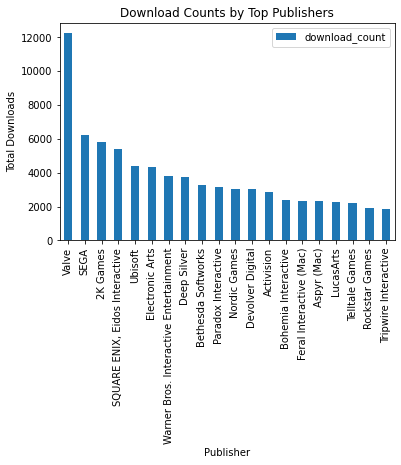

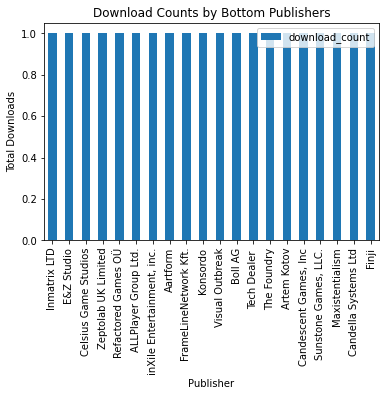

In [38]:
games_combined = user_games.merge(game_publishers, how="left",left_on="appid", right_on="appId")
games_combined["download_count"] = games_combined["appid"]
top_downloads_publishers = games_combined.groupby("publisher").agg({"playtime_forever": "mean","download_count":"count"}).reset_index().sort_values(by="download_count", ascending=False).head(20)
bottom_downloads_publishers = games_combined.groupby("publisher").agg({"playtime_forever": "mean","download_count":"count"}).reset_index().sort_values(by="download_count", ascending=True).head(20)

top_downloads_publishers.plot.bar(x='publisher', y='download_count', xlabel='Publisher', ylabel='Total Downloads', title='Download Counts by Top Publishers')
bottom_downloads_publishers.plot.bar(x='publisher', y='download_count', xlabel='Publisher', ylabel='Total Downloads', title='Download Counts by Bottom Publishers')


<AxesSubplot:title={'center':'Average Playtimes(mins) by Bottom Publishers'}, xlabel='Publisher', ylabel='Average Playtimes'>

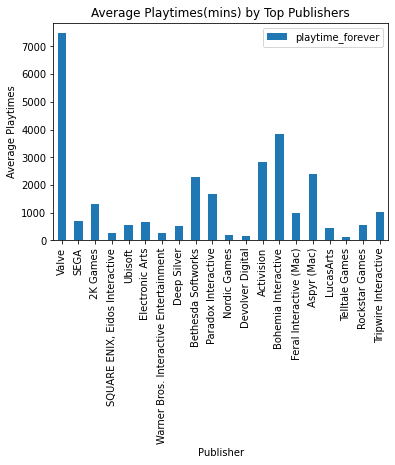

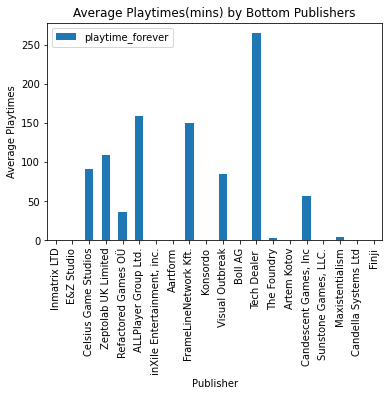

In [39]:
top_downloads_publishers.plot.bar(x='publisher', y='playtime_forever', xlabel='Publisher', ylabel='Average Playtimes', title='Average Playtimes(mins) by Top Publishers')
bottom_downloads_publishers.plot.bar(x='publisher', y='playtime_forever', xlabel='Publisher', ylabel='Average Playtimes', title='Average Playtimes(mins) by Bottom Publishers')


**We've done some more analysis using PySpark and Databricks. This is available in a separate notebook that we have submitted.**

In [0]:
!head Friends.csv

0,76561197999883107,76561198015117480,friend,2009-12-16 18:51:40,2013-06-25 08:26:24,
1,76561198002514375,76561198015117480,friend,2009-12-14 17:02:05,2013-06-25 08:26:24,
2,76561198005305156,76561198015117480,friend,2009-12-08 16:16:14,2013-06-25 08:26:24,
3,76561198014391711,76561198015117480,friend,2009-12-20 18:46:21,2013-06-25 08:26:24,
4,76561198015117480,76561198015374507,friend,2009-12-08 16:16:16,2013-06-25 08:26:24,
5,76561197960362327,76561198015117430,friend,2009-11-23 07:57:11,2013-06-25 08:26:18,
6,76561197960502537,76561198015117430,friend,2011-02-17 02:16:39,2013-06-25 08:26:18,
7,76561197965033642,76561198015117430,friend,2009-11-23 10:36:55,2013-06-25 08:26:18,
8,76561197966638212,76561198015117430,friend,2011-08-11 15:05:18,2013-06-25 08:26:18,
9,76561197968843796,76561198015117430,friend,2010-11-19 11:59:49,2013-06-25 08:26:18,


In [0]:
from pyspark import SparkFiles
data_df = sqlContext.read.csv("file:///Friends.csv").toDF("ID", "FriendIDA", "FriendIDB", "type", "FriendSince", "LastCrawled", "Nothing")


Loading all of the Graph data. In this section we use Pyspark and databricks to operate efficiently on the large dataset.

In [0]:
data_df.count()

Out[8]: 101538000

In [0]:
data_df.columns

Out[9]: ['ID',
 'FriendIDA',
 'FriendIDB',
 'type',
 'FriendSince',
 'LastCrawled',
 'Nothing']

In [0]:
data_df = data_df.drop("type", "LastCrawled", "Nothing")

Firstly, We get the degrees of each vertex, and plot that as a histogram. To do so, we need to define an associated parser for the data. As we try to get some idea of the relationship (as it's been observed that social networks have a nice relationship here). Grab each friend and unzip it accordingly. 


In [0]:
from operator import add
data_unzipped = data_df.rdd.flatMap(lambda x: [(x[1],1), (x[2],1)]).reduceByKey(add)

In [0]:
import matplotlib.pyplot as plt
data_2 = data_unzipped.map(lambda x: x[1])
hist = data_2.histogram([1,3,10,30,100,300,1000,3000,10000,30000,100000])

Here, we'll plot the binned degree-count relationship on a log-log graph. Here, we're looking to have nodes with high-degree, as that indicates that our sampled data was sampled appropriately.

Out[13]: Text(0.5, 0, 'Degree of Members in Graph')

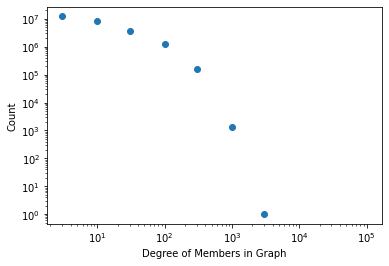

In [0]:
plt.scatter(hist[0][1:],hist[1])
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Count")
plt.xlabel("Degree of Members in Graph")

This indicates that our sampling is good. Once we figure it out, we can display this data to look at different relationships and tell a store about STEAM friendships and Steam communities. 

It looks like we have a dense-enough network! In the future, we're probably going to use an even smaller subset, or work on tools to simplify the processing somewhat, but this is a good start with the EDA and demonstrates that this subsetting works, which is the most important point currently. 

## Research Questions

During the implementation of our project, we hope to answer the following research questions:

1. Looking for communities / subcommunities using degree analysis and seeing how the communities are connected to one another. The approach we will follow for this would be to run some social cluster detection algorithms.
2. Is there any relationship between the number of hours spent on a game and the achievement percentage of users? This would help in identifying gaming behaviour and patterns.
3. Look at the price and associated information for games such as, history and genre and time-published, to understand if games have gotten more expensive over the years and if the number of games that have "low" prices and are considered shovelware have a declining trend.
4. Look at the distribution of ratings and genre over time to understand if the games have gotten less rated nowadays as studios understand content warnings, or if there's a lack of content warnings happening.
5. Identifying the locational distribution of steam connections and whether there are a large number of users who are connected across regions. We intend to see if this might indicate that the communities formed are more collaborative and interesting to study than traditional social networks, which tend to follow people who live near each other.
6. What makes a top gamer? Are there any similarities between the Best Gamers? Is there any particular country that has a huge majority of them? 

We may explore collaborative filtering or regression models in addition to social cluster detection algorithms to understand and analyze the trends in our dataset.